In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
btc = pd.read_csv('BTC-USD.csv', index_col='Date', parse_dates=True)

btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


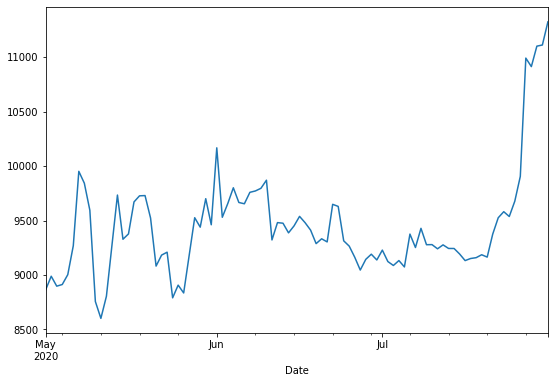

In [10]:
btc['2020-05':'2020-07']['Close'].plot(figsize=(9,6))
plt.show()

Date
2019-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2019-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-02-29    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-08-31    AxesSubplot(

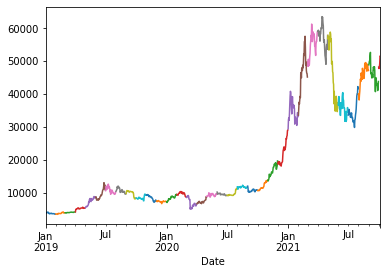

In [15]:
btc['2019':'2021']['Close'].resample('M').plot()

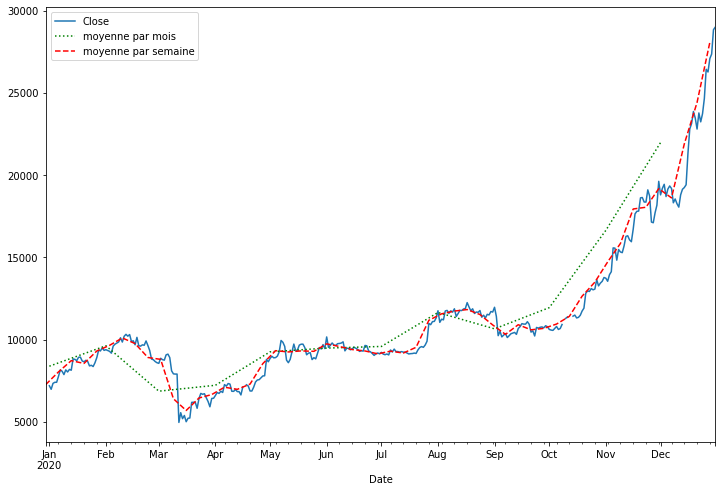

In [21]:
plt.figure(figsize=(12,8))

btc.loc['2020', 'Close'].plot()
btc.loc['2020', 'Close'].resample('M').mean().plot(label='moyenne par mois', ls=':', c='g')
btc.loc['2020', 'Close'].resample('W').mean().plot(label='moyenne par semaine', ls='--', c='r')
plt.legend()
plt.show()

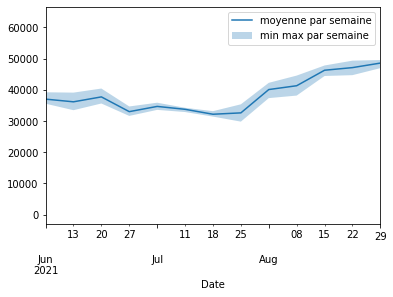

In [26]:
m = btc['Close'].resample('W').agg(['mean', 'std', 'max', 'min'])

m['mean']['2021-06':'2021-08'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.3, label='min max par semaine')
plt.legend()
plt.show()

/tmp/ipykernel_73428/1441221962.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  m['2021'].plot()


<AxesSubplot:xlabel='Date'>

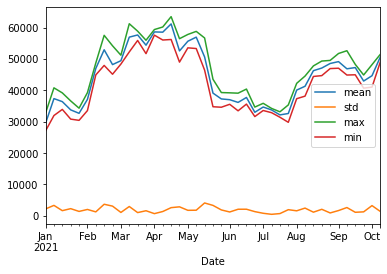

In [28]:
m['2021'].plot()

In [30]:
eth = pd.read_csv('ETH-USD.csv', index_col='Date', parse_dates=True)

btc_eth = pd.merge(btc, eth, on='Date', how='inner', suffixes=('_btc', '_eth'))

btc_eth[['Close_eth', 'Close_btc']]['2021-06'].plot(subplots=True, figsize=(12,8))

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2015-08-07,278.740997,280.391998,276.365997,279.584991,279.584991,4.248480e+07,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05
2015-08-08,279.742004,279.928009,260.709991,260.997009,260.997009,5.853300e+07,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05
2015-08-09,261.115997,267.002991,260.467987,265.083008,265.083008,2.378960e+07,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05
2015-08-10,265.477997,267.032013,262.596008,264.470001,264.470001,2.097940e+07,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05
2015-08-11,264.342010,270.385986,264.093994,270.385986,270.385986,2.543390e+07,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-02,48137.468750,48282.062500,47465.496094,47711.488281,47711.488281,3.061435e+10,3308.870361,3464.837402,3260.027588,3391.694336,3391.694336,1.920267e+10
2021-10-03,47680.027344,49130.691406,47157.289063,48199.953125,48199.953125,2.663812e+10,3390.767578,3484.605713,3348.120117,3418.358643,3418.358643,1.551657e+10
2021-10-04,48208.906250,49456.777344,47045.003906,49112.902344,49112.902344,3.338317e+10,3418.776367,3434.775391,3283.448730,3380.089111,3380.089111,1.774715e+10
